### Importing all the necessary Pandas libraries

In [3]:
# Importing all the necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Reading the dataset 

In [4]:
# Dataset contains different types of food data (calories,fat,protein&fat) along with COVID 19 data by list of countries
# According to the datasource Food intake data is represented % of total intake amount

calories = pd.read_csv('Food_Supply_kcal_Data.csv')
protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
qty = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

### Checking the dataset

In [5]:
# Shape of the dataframe

nRow, nCol = calories.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 170 rows and 33 columns


In [6]:
# Checking sample dataset for any NaN values in the columns of interest

# calories.info()
calories.isna().sum()

Country                         0
Continent                       0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         3
Undernourished                  7
Confirmed                       6
Deaths                          6
Recovered     

In [8]:
calories.head(3)

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,Asia,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,...,2.3012,0.7504,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38928000.0,%
1,Albania,Europe,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,...,2.8244,2.7508,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2838000.0,%
2,Algeria,Africa,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,...,5.7638,2.0457,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44357000.0,%


In [24]:
# Dropping countries where 'Confirmed' COVID cases,'Undernourished' & 'Obesity' data is Not Available

calories.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)
protein.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)
fat.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)
qty.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)



In [25]:
#Checking for NaN values

calories.isna().sum()

Country                         0
Continent                       0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered     

## Data aggregation and some basic facts from the dataset

In [26]:
# Aggregating by continents

calories.groupby(['Continent']).mean()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,0.837409,4.433038,0.323216,0.000000,24.090520,0.124718,0.442778,2.012291,1.951249,1.449707,...,0.148382,45.568036,4.593960,0.747804,10.515556,0.354402,0.006689,0.292284,0.055429,2.655202e+07
Asia,0.639597,8.238465,0.843444,0.012944,25.038885,0.486582,0.758421,1.850500,3.369394,2.608956,...,0.355465,41.764300,4.380347,1.375053,14.708824,1.248080,0.015447,1.107367,0.125266,1.286428e+08
Europe,2.485812,14.360317,2.723239,0.000000,15.164915,0.661207,0.633407,1.780400,5.153717,5.038127,...,0.415351,35.643149,5.567259,1.353707,24.956098,4.091245,0.077522,2.497560,1.516151,2.022968e+07
North America,1.525110,9.938260,1.180070,0.000000,15.974040,0.492790,0.596830,3.274010,4.701850,2.842700,...,0.179450,40.061020,5.318300,0.913450,27.230000,1.368748,0.031564,0.489194,0.920544,5.323230e+07
Oceania,0.902567,10.712067,2.007183,0.005600,14.452000,0.299833,1.118167,1.876767,5.318033,1.828883,...,0.261017,39.282550,4.107517,0.702050,30.316667,0.027673,0.000709,0.025254,0.001710,5.478833e+06
South America,1.152235,9.339890,1.073895,0.000000,19.882320,0.519140,0.388180,2.094510,4.353105,2.890480,...,0.131695,40.658120,4.992775,0.856195,22.530000,2.148988,0.053871,1.823015,0.279276,2.405415e+07


In [27]:
# Country with lowest number of confirmed COVID cases as % of population

calories[calories['Confirmed'] == calories['Confirmed'].min()]

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
164,Vanuatu,Oceania,0.2668,7.4519,0.667,0.0,16.1044,0.1906,1.2197,2.287,...,2.1536,0.6099,23.5,7.2,0.000312,0.0,0.000312,0.0,321000.0,%


In [28]:
# Country with lowest COVID fatality rate as % of population
calories[calories['Deaths'] == calories['Deaths'].min()]

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
24,Cambodia,Asia,1.4153,4.0437,0.1011,0.0000,33.0166,0.1011,1.7792,0.6470,...,1.3142,0.3639,3.5,16.4,0.002813,0.0,0.002465,0.000348,15497000.0,%
41,Dominica,North America,1.4266,10.9375,0.9341,0.0000,11.3791,0.1529,1.0360,5.8254,...,2.9721,1.0360,28.2,6.2,0.151389,0.0,0.140278,0.011111,72000.0,%
85,Lao People's Democratic Republic,Asia,1.1323,4.7916,0.6072,0.0000,29.4880,0.1149,0.7877,4.1516,...,1.4605,2.0348,4.5,16.5,0.000566,0.0,0.000566,0.000000,7242000.0,%
131,Samoa,Oceania,0.5210,13.4454,2.0000,0.0336,9.6134,0.1513,1.7479,3.8992,...,3.4454,0.3193,45.5,2.7,0.001000,0.0,0.001000,0.000000,200000.0,%
139,Solomon Islands,Oceania,0.2697,4.1693,0.6638,0.0000,16.7393,0.0830,1.3483,1.1201,...,2.1987,0.2074,20.5,8.9,0.002378,0.0,0.001399,0.000979,715000.0,%
150,Timor-Leste,Asia,0.1169,5.0491,0.3974,0.0000,32.7256,0.0701,0.3740,0.6078,...,2.9687,0.4441,2.9,24.9,0.003869,0.0,0.003414,0.000455,1318000.0,%
164,Vanuatu,Oceania,0.2668,7.4519,0.6670,0.0000,16.1044,0.1906,1.2197,2.2870,...,2.1536,0.6099,23.5,7.2,0.000312,0.0,0.000312,0.000000,321000.0,%


In [29]:
# Country with the most number of confirmed COVID cases as % of population

calories[calories['Confirmed'] == calories['Confirmed'].max()] 

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
102,Montenegro,Europe,1.4078,17.6268,1.3935,0.0,16.1184,0.6608,0.3591,2.3416,...,3.0599,1.0918,24.9,<2.5,8.799035,0.119132,7.136334,1.543569,622000.0,%


In [30]:
# Country with highest COVID fatality rate as % of population

calories[calories['Deaths'] == calories['Deaths'].max()]

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
14,Belgium,Europe,2.3089,14.1587,4.7771,0.0,13.0441,0.69,0.5971,1.38,...,7.0727,1.7383,24.5,<2.5,5.862692,0.176743,0.0,5.685949,11515000.0,%


In [31]:
# Validating that Total of intake columns % values equal to 100.

total = qty.iloc[:, 2:25].sum(axis=1)
print(total)


0      100.0000
1      100.0000
2      100.0000
3      100.0000
5      100.0000
         ...   
165     99.9999
166    100.0001
167    100.0001
168    100.0002
169    100.0002
Length: 156, dtype: float64


In [32]:
# Undernourished column has floats and 'strings', which needs to be cleaned up before further processing
# Population column has absolute numbers, which needs to truncated for display purposes.


calories['Undernourished'].head(25) 

0     29.8
1      6.2
2      3.9
3       25
5      4.6
6      4.3
7     <2.5
8     <2.5
9     <2.5
11    14.7
12     3.9
13    <2.5
14    <2.5
15     7.5
16    10.1
17    17.1
18    <2.5
19    26.4
20    <2.5
21     3.6
22      20
23    12.6
24    16.4
25     9.9
26    <2.5
Name: Undernourished, dtype: object

In [33]:
# Method to remove special character(s) and convert values to float

def to_float(x):
    if isinstance(x,str):
        return float(x.lstrip('<'))
    else:
        return x

In [34]:
# Method to convert population to millions 

def convert(x):
    x = round(x/1000000,2)
    return x

In [35]:
# Invoke to_float()method to convert column "Undernourished"

protein['Undernourished']= protein['Undernourished'].apply(to_float)
calories['Undernourished']= calories['Undernourished'].apply(to_float)
fat['Undernourished']= fat['Undernourished'].apply(to_float)
qty['Undernourished']= qty['Undernourished'].apply(to_float)


In [36]:
# Checking results of to_float methd

qty['Undernourished'].head(25)

0     29.8
1      6.2
2      3.9
3     25.0
5      4.6
6      4.3
7      2.5
8      2.5
9      2.5
11    14.7
12     3.9
13     2.5
14     2.5
15     7.5
16    10.1
17    17.1
18     2.5
19    26.4
20     2.5
21     3.6
22    20.0
23    12.6
24    16.4
25     9.9
26     2.5
Name: Undernourished, dtype: float64

In [37]:
# Invoke convert() method to convert population to millions

protein['Population']= protein['Population'].apply(convert)
calories['Population']= calories['Population'].apply(convert)
fat['Population']= fat['Population'].apply(convert)
qty['Population']= qty['Population'].apply(convert)

In [38]:
calories.head(3)

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,Asia,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,...,2.3012,0.7504,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93,%
1,Albania,Europe,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,...,2.8244,2.7508,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84,%
2,Algeria,Africa,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,...,5.7638,2.0457,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44.36,%


In [166]:
# Rename Population Column to add (million)

In [39]:
calories.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)
protein.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)
fat.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)
qty.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)

In [40]:
# calories.head(2)
qty.head(2)

,Country,Continent,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population (Million),Unit (all except Population)
0,Afghanistan,Asia,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,...,6.7642,40.5645,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93,%
1,Albania,Europe,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,...,11.7753,31.2304,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84,%


In [42]:
# Drop the last column "Unit" since it has no purpose for further analysis

protein.drop(columns=['Unit (all except Population)'],inplace = True)
calories.drop(columns=['Unit (all except Population)'],inplace = True)
fat.drop(columns=['Unit (all except Population)'],inplace = True)
qty.drop(columns=['Unit (all except Population)'],inplace = True)

qty.head(3)


,Country,Continent,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population (Million)
0,Afghanistan,Asia,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,...,0.5345,6.7642,40.5645,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93
1,Albania,Europe,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,...,0.3261,11.7753,31.2304,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84
2,Algeria,Africa,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,...,1.0310,11.6484,40.3651,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44.36


### Categorizing intake source columns by food groups

In [44]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Continent                 156 non-null    object 
 2   Alcoholic Beverages       156 non-null    float64
 3   Animal Products           156 non-null    float64
 4   Animal fats               156 non-null    float64
 5   Aquatic Products, Other   156 non-null    float64
 6   Cereals - Excluding Beer  156 non-null    float64
 7   Eggs                      156 non-null    float64
 8   Fish, Seafood             156 non-null    float64
 9   Fruits - Excluding Wine   156 non-null    float64
 10  Meat                      156 non-null    float64
 11  Milk - Excluding Butter   156 non-null    float64
 12  Miscellaneous             156 non-null    float64
 13  Offals                    156 non-null    float64
 14  Oilcrops  

In [45]:
# The column orders were different for each file, so I had to repeat it for each dataset separately

qty['Meat Products'] = qty.iloc[:,[3,4,10,13]].sum(axis=1)
qty['Aquatic & Seafood'] = qty.iloc[:,[5,8]].sum(axis=1) 
qty['Plant Products'] = qty.iloc[:,[6,9,14,15,16,17,21,22,23,24]].sum(axis=1)
qty['Sugars'] = qty.iloc[:,[19,20]].sum(axis=1)

calories['Meat Products'] = calories.iloc[:,[3,4,10,13]].sum(axis=1)
calories['Aquatic & Seafood'] = calories.iloc[:,[5,8]].sum(axis=1) 
calories['Plant Products'] = calories.iloc[:,[6,9,14,15,16,17,21,22,23,24]].sum(axis=1)
calories['Sugars'] = calories.iloc[:,[19,20]].sum(axis=1)

protein['Meat Products'] = protein.iloc[:,[3,4,10,12]].sum(axis=1)
protein['Aquatic & Seafood'] = protein.iloc[:,[5,8]].sum(axis=1) 
protein['Plant Products'] = protein.iloc[:,[6,9,13,14,15,16,20,21,22,23]].sum(axis=1)
protein['Sugars'] = protein.iloc[:,[18,19]].sum(axis=1)

fat['Meat Products'] = fat.iloc[:,[3,4,10,13]].sum(axis=1)
fat['Aquatic & Seafood'] = fat.iloc[:,[5,8]].sum(axis=1) 
fat['Plant Products'] = fat.iloc[:,[6,9,14,15,16,17,21,22,23,24]].sum(axis=1)
fat['Sugars'] = fat.iloc[:,[19,20]].sum(axis=1)


In [46]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 169
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Continent                 156 non-null    object 
 2   Alcoholic Beverages       156 non-null    float64
 3   Animal Products           156 non-null    float64
 4   Animal fats               156 non-null    float64
 5   Aquatic Products, Other   156 non-null    float64
 6   Cereals - Excluding Beer  156 non-null    float64
 7   Eggs                      156 non-null    float64
 8   Fish, Seafood             156 non-null    float64
 9   Fruits - Excluding Wine   156 non-null    float64
 10  Meat                      156 non-null    float64
 11  Miscellaneous             156 non-null    float64
 12  Milk - Excluding Butter   156 non-null    float64
 13  Offals                    156 non-null    float64
 14  Oilcrops  

### Removing individual columns that have been grouped into categories

In [48]:
## Dropping individual columns of grouped categories

cols = [3,4,5,6,8,9,10,13,14,15,16,17,19,20,21,22,23,24]
qty.drop(qty.columns[cols],axis=1,inplace=True)

cols = [3,4,5,6,8,9,10,13,14,15,16,17,19,20,21,22,23,24]
calories.drop(calories.columns[cols],axis=1,inplace=True)

cols = [3,4,5,6,8,9,10,12,13,14,15,16,18,19,20,21,22,23]
protein.drop(protein.columns[cols],axis=1,inplace=True)

cols = [3,4,5,6,8,9,10,13,14,15,16,17,19,20,21,22,23,24]
fat.drop(fat.columns[cols],axis=1,inplace=True)


In [49]:
fat.head(2)

,Country,Continent,Alcoholic Beverages,Eggs,Miscellaneous,Milk - Excluding Butter,Stimulants,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population (Million),Meat Products,Aquatic & Seafood,Plant Products,Sugars
0,Afghanistan,Asia,0.0,0.6859,0.0163,8.2803,0.098,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93,34.2968,0.0327,56.5898,0.0
1,Albania,Europe,0.0,1.6448,0.0170,17.7576,0.527,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84,44.4535,0.1445,35.4557,0.0


## Data Analysis

### Correlation between Obesity & COVID mortality rate

In [264]:
obesity = protein[['Obesity', 'Deaths']]
obesity

,Obesity,Deaths
0,4.5,0.005970
1,22.3,0.044574
2,26.6,0.006373
3,6.8,0.001316
5,28.5,0.099669
...,...,...
165,25.2,0.003823
166,2.1,0.000036
167,14.1,0.002052
168,6.5,0.002867


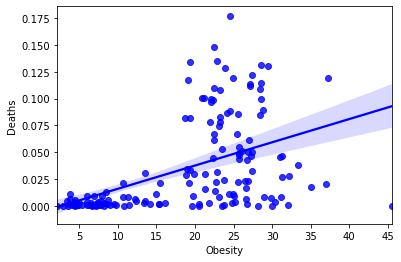

In [266]:
# Scatter plot showing correlation between Obesity & death rates

sns.regplot(x='Obesity', y='Deaths', color="blue", data=obesity);

Data indicates positive correlation between obesity rate and COVID deaths

### Impact of food intake sources on COVID mortality rate

In [53]:
# Correlation Matrix between Protein intake sources & COVID Deaths
# Color Options: "Blues", "YlOrBr", 'Purples_r', 'RdBu','RdGy', YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr
# Using seaborn heatmap() method to plot the Matrix

###### Protein Sources

# compare1 = ['Alcoholic Beverages','Sugars','Eggs','Meat Products','Plant Products','Aquatic & Seafood','Stimulants','Deaths']
# df = protein[compare1]
# corr1 = df.corr()
# mask1 = np.triu(np.ones_like(corr1, dtype=np.bool))

# sns.heatmap(corr1, mask=mask1, annot=True, cmap="YlGnBu", linewidths=.1)

# yticks = [i.upper() for i in corr1.index]
# xticks = [i.upper() for i in corr1.columns]
# plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
# plt.xticks(plt.xticks()[0], labels=xticks)

# title = 'CORRELATION MATRIX\nPROTEIN SOURCE & COVID MORTALITY\n'
# plt.title(title, loc='center', fontsize=12)
# plt.show()


###### Calorie Sources

# compare2 = ['Alcoholic Beverages','Sugars','Eggs','Meat Products','Plant Products','Aquatic & Seafood','Stimulants','Deaths']
# df2 = calories[compare2]
# corr2 = df2.corr()
# mask2 = np.triu(np.ones_like(corr2, dtype=np.bool))

# sns.heatmap(corr2, mask=mask2, annot=True, cmap="YlOrBr", linewidths=.1)

# yticks = [i.upper() for i in corr2.index]
# xticks = [i.upper() for i in corr2.columns]
# plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
# plt.xticks(plt.xticks()[0], labels=xticks)

# title = 'CORRELATION MATRIX\nCALORIE SOURCE & COVID MORTALITY\n'
# plt.title(title, loc='center', fontsize=12)
# plt.show()


###### Fat Sources

# compare3 = ['Alcoholic Beverages','Sugars','Eggs','Meat Products','Plant Products','Aquatic & Seafood','Stimulants','Deaths']
# df3 = fat[compare3]
# corr3 = df3.corr()
# mask3 = np.triu(np.ones_like(corr3, dtype=np.bool))

# sns.heatmap(corr3, mask=mask3, annot=True, cmap="Blues", linewidths=.1)

# yticks = [i.upper() for i in corr3.index]
# xticks = [i.upper() for i in corr3.columns]
# plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
# plt.xticks(plt.xticks()[0], labels=xticks)

# title = 'CORRELATION MATRIX\nFAT SOURCE & COVID MORTALITY\n'
# plt.title(title, loc='center', fontsize=12)
# plt.show()




#### Kernel Density Estimation (KDE)

In [56]:
# fig, ax = plt.subplots(1, figsize=(12,8))
# sns.kdeplot(df['Meat Products'], df['Deaths'], cmap='Blues', shade=True, shade_lowest=False, clip=(-1,300))
# plt.scatter(df['Meat Products'], df['Deaths'], color='red')
# plt.show()

        Heatmap showing data clustering (protein from meat products vs COVID death rate)


In [15]:
# fig, ax = plt.subplots(1, figsize=(12,8))
# sns.kdeplot(df2['Meat Products'], df2['Deaths'], cmap='Blues', shade=True, shade_lowest=False, clip=(-1,300))
# plt.scatter(df2['Meat Products'], df2['Deaths'], color='navy')
# plt.show()

       Heatmap showing data clustering (calories from meat products vs COVID death rate)

### Results and takeaways

- Data shows stronger correlation between Calories & Protein intake from Alcoholic beverages, Meat Products, Eggs and higher COVID mortality rate
- Negative correlation between Plants/Aquatic sources & COVID deaths
- Key takeaways - EAT YOUR VEGGIES & DRINK IN MODERATION
